## CNN 짜기
1. king_11.csv
2. text 열을 가져오기

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# 데이터 로드
file = '../data/king_3.csv'
data = pd.read_csv(file, encoding='utf-8', sep=';')

# 데이터 확인
# print(data['text'].head())

# 토크나이저
from konlpy.tag import Okt
Okt = Okt()
data_token = []

for line in data['text']:
    # 토크나이징
    tokens = Okt.nouns(line)
    # 정규표현식으로 한글만 추출
    tokens = [token for token in tokens if re.match(r'^[가-힣]+$', token)]
    
    # 데이터프레임에 추가
    data_token.append(tokens)

print(data_token[:5])


[['신사', '정흠', '포천', '그', '어머니', '오기', '청', '허락', '술', '고기'], ['병조', '계', '강무', '군국', '의', '중대사', '데', '공신', '의', '자손', '면죄', '것', '다행', '군법', '청컨대', '대열', '의', '예', '공신', '자손', '법', '범한', '자', '조', '바로', '직단', '군령', '엄히', '하소', '하니', '그대로'], ['영평', '현', '굴'], ['포천현', '매장'], ['안개', '몇', '걸음', '밖', '사람', '분별']]


In [164]:
vocab = {}
for tokens in data_token:
    # 빈도수 계산
    for token in tokens:
        if token not in vocab:
            vocab[token] = 1
        else:
            vocab[token] += 1

# 빈도수 정렬
vocab = dict(sorted(vocab.items(), key=lambda x: x[1], reverse=True))

print(len(vocab), list(vocab.items())[:20])

# 한 글자 제거
vocab_1 = {word: freq for word, freq in vocab.items() if len(word) > 1}
print(len(vocab_1), list(vocab_1.items())[:20])

# 불용어 제거
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다', '것', '수', '그', '을', '등', '또']
vocab_stp = {word: freq for word, freq in vocab_1.items() if word not in stopwords}
print(len(vocab_stp), list(vocab_stp.items())[:20])

# 빈도수 1이하 제거
vocab_2 = {word: freq for word, freq in vocab_stp.items() if freq > 1}
print(len(vocab_2), list(vocab_2.items())[:20])

29654 [('것', 62088), ('이', 31921), ('의', 31005), ('그', 27901), ('말', 24436), ('를', 22528), ('사람', 17938), ('하니', 16808), ('등', 15120), ('또', 12714), ('임금', 12539), ('모두', 11972), ('수', 10977), ('때', 10486), ('명', 10277), ('은', 9165), ('과', 8440), ('일', 8093), ('청', 7035), ('지금', 6769)]
28896 [('사람', 17938), ('하니', 16808), ('임금', 12539), ('모두', 11972), ('지금', 6769), ('그대로', 6610), ('여러', 6314), ('비록', 6017), ('백성', 5728), ('전하', 5670), ('어찌', 5510), ('이제', 5473), ('생각', 5389), ('의논', 5123), ('나라', 5009), ('또한', 5005), ('우리', 4744), ('다시', 4705), ('하소', 4449), ('반드시', 4393)]
28896 [('사람', 17938), ('하니', 16808), ('임금', 12539), ('모두', 11972), ('지금', 6769), ('그대로', 6610), ('여러', 6314), ('비록', 6017), ('백성', 5728), ('전하', 5670), ('어찌', 5510), ('이제', 5473), ('생각', 5389), ('의논', 5123), ('나라', 5009), ('또한', 5005), ('우리', 4744), ('다시', 4705), ('하소', 4449), ('반드시', 4393)]
20694 [('사람', 17938), ('하니', 16808), ('임금', 12539), ('모두', 11972), ('지금', 6769), ('그대로', 6610), ('여러', 6314), ('비록', 6017), ('백

In [165]:
# 인코딩
word_to_index = {word: index + 2 for index, (word, freq) in enumerate(vocab_2.items())}
word_to_index['<unk>'] = 1
word_to_index['<pad>'] = 0

index_to_word = {index: word for word, index in word_to_index.items()}
vocab_size = len(word_to_index)
print(vocab_size)

# 텍스트를 인덱스로 변환
data_index = []
for tokens in data_token:
    # 없으면 <unk>로 대체
    tokens = [token if token in word_to_index else '<unk>' for token in tokens]
    # 인덱스로 변환
    tokens = [word_to_index[token] for token in tokens]
    data_index.append(tokens)
    
print(data_token[:20])
print(data_index[:20])

20696
[['신사', '정흠', '포천', '그', '어머니', '오기', '청', '허락', '술', '고기'], ['병조', '계', '강무', '군국', '의', '중대사', '데', '공신', '의', '자손', '면죄', '것', '다행', '군법', '청컨대', '대열', '의', '예', '공신', '자손', '법', '범한', '자', '조', '바로', '직단', '군령', '엄히', '하소', '하니', '그대로'], ['영평', '현', '굴'], ['포천현', '매장'], ['안개', '몇', '걸음', '밖', '사람', '분별'], ['경기', '감사', '유계', '문', '과', '도사', '조항', '등', '옷', '하사'], ['낙비', '뇌', '번개'], ['낮', '미사리', '북쪽', '왕세자', '맞이'], ['진평', '대군', '이유', '군기', '부정', '윤번', '의', '딸', '장가'], ['윤대', '를', '행'], ['좌', '김효정', '등', '상소', '앞서', '성군', '이개', '의', '일로', '소', '신청', '사오', '윤허', '입지', '못', '다시', '천총', '번', '개', '인', '거', '수', '것', '사실', '전', '양녕', '대군', '이제', '그', '아들', '서울', '젖', '태종', '진달', '태종', '말씀', '네', '아들', '서울', '한단', '말', '나라', '근심', '뒤', '염려', '환난', '미연', '교훈', '지극', '것', '본원', '누차', '소', '개', '서울', '살', '수', '음', '진달', '사오', '윤허', '얻지', '못', '지금', '오히려', '결망', '중', '전하', '정', '그', '작위', '녹봉', '또', '인', '하사', '소인', '은밀', '길', '신', '등', '생각', '그', '아비', '종사', '군부', '죄', '어찌', '그', '아들',

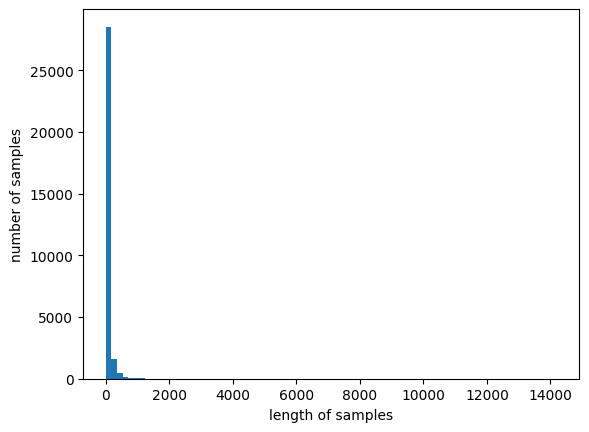

최대 길이: 14195
최소 길이: 1
평균 길이: 62.88442893154935
중간 길이: 22.0


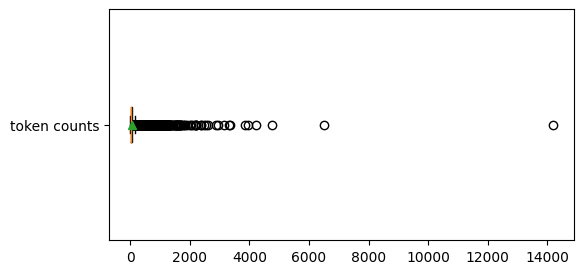

In [166]:
# 패딩
# - 문장 길이 분포 확인
# - 최대, 최소, 평균, 중간값
total_len = [len(tokens) for tokens in data_index]
plt.hist(total_len, bins=80)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

print('최대 길이:', np.max(total_len))
print('최소 길이:', np.min(total_len))
print('평균 길이:', np.mean(total_len))
print('중간 길이:', np.median(total_len))

# 박스플롯
plt.figure(figsize=(6, 3))
plt.boxplot(total_len, labels=['token counts'], showmeans=True, vert=False)
plt.show()

30942 30475


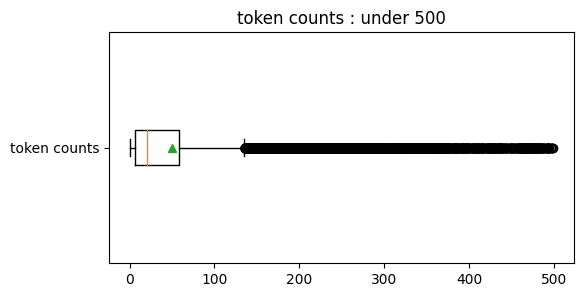

In [167]:
# 문장 길이가 500 이상인 데이터 제거
data_index_500 = [tokens for tokens in data_index if len(tokens) < 500]
print(len(data_index), len(data_index_500))

plt.figure(figsize=(6, 3))
plt.boxplot([len(tokens) for tokens in data_index_500], labels=['token counts'], showmeans=True, vert=False)
plt.title('token counts : under 500')
plt.show()

30475 29827


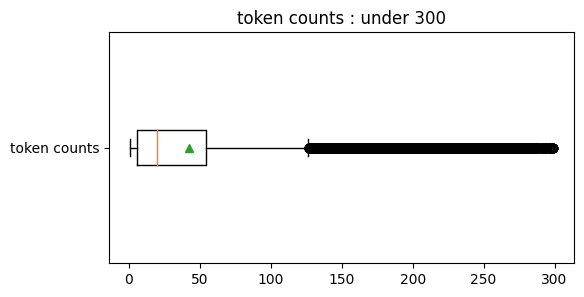

In [168]:
# 300 이하 제거
data_index_300 = [tokens for tokens in data_index_500 if len(tokens) < 300]
print(len(data_index_500), len(data_index_300))

plt.figure(figsize=(6, 3))
plt.boxplot([len(tokens) for tokens in data_index_300], labels=['token counts'], showmeans=True, vert=False)
plt.title('token counts : under 300')
plt.show()

In [67]:
# %pip install wordcloud

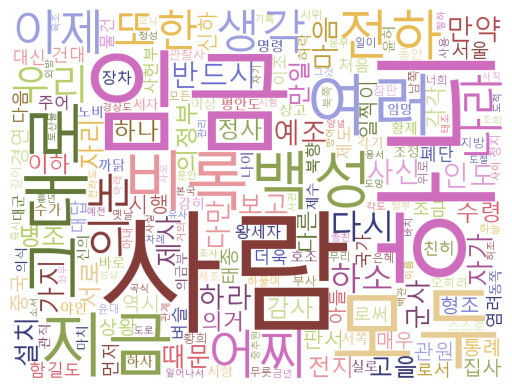

In [169]:
# vocab2 Wordcloud
# from wordcloud import WordCloud
# wc = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', background_color='white', width=800, height=600, colormap='tab20b')
# wc.generate_from_frequencies(vocab_2)
# plt.imshow(wc)
# plt.axis('off')
# plt.show()

In [170]:

# 패딩
# - 문장 길이가 300 이하인 데이터만 사용
max_len = 300
data_pad = []
for tokens in data_index:
    if len(tokens) < max_len:
        tokens += [word_to_index['<pad>']] * (max_len - len(tokens))
        data_pad.append(tokens)
    # 300 이상은 300 단어까지만 사용
    else:
        data_pad.append(tokens[:300])
        
data_pad = np.array(data_pad)
print(data_pad[:5], data_pad.shape)

[[ 318  789 3473 ...    0    0    0]
 [  39    1  495 ...    0    0    0]
 [3334    1    1 ...    0    0    0]
 [9220 2218    0 ...    0    0    0]
 [3862    1 4293 ...    0    0    0]] (30942, 300)


패딩까지 완료

In [ ]:
data['month'].

In [202]:
# month 추출 : '10월' 형식이므로 숫자만 정수로 추출
# - 윤달도 포함
month = data['month'].str.extract('(\d+)')
# print(month.head())
print(month.value_counts())

7     2885
1     2871
4     2734
2     2708
8     2631
5     2547
10    2500
12    2462
3     2450
6     2441
11    2376
9     2333
Name: count, dtype: int64


In [204]:
# CNN model
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# 데이터셋 생성
# - 데이터 : data_pad
# - 타겟 : month

class Mydataset(torch.utils.data.Dataset):
    def __init__(self, data, target):
        self.data = torch.Tensor(data).long()
        self.target = target.values.astype(np.int64)
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        x = self.data[idx]
        y = self.target[idx]
        return x, y
    
Mydatasets = Mydataset(data_pad, month)
print(len(Mydatasets), Mydatasets[0])

ValueError: cannot convert float NaN to integer

In [195]:

# CNN 모델
class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_size, output_size, kernel_size, stride, padding):
        super(CNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_size)
        self.conv = nn.Conv1d(in_channels=embedding_size, out_channels=output_size, kernel_size=kernel_size, stride=stride, padding=padding)
        self.fc = nn.Linear(output_size, 12)
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.embedding(x)
        x = self.conv(x)
        x = F.max_pool1d(x, x.size(2)).squeeze(2)
        x = self.fc(x)
        x = self.softmax(x)
        return x
    
# 모델 생성
vocab_size = len(word_to_index)
embedding_size = 300            # 워드 벡터 차원
output_size = 128               # 출력 채널 수
kernel_size = 10                # 한번에 처리할 일 수 : 열흘
stride = 2                      # 스트라이드
padding = 1                     # 패딩

model = CNN(vocab_size, embedding_size, output_size, kernel_size, stride, padding)
print(model)

CNN(
  (embedding): Embedding(20696, 300)
  (conv): Conv1d(300, 128, kernel_size=(10,), stride=(2,), padding=(1,))
  (fc): Linear(in_features=128, out_features=12, bias=True)
  (softmax): Softmax(dim=1)
)


In [196]:
# 학습
# - 데이터셋 분리
random_split = torch.utils.data.random_split(Mydatasets, [0.8, 0.2], generator=torch.Generator().manual_seed(42))

# - 데이터셋 생성
train_dataset, test_dataset = random_split
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 확인
for x, y in train_loader:
    print(x.shape, y.shape)
    break


TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found object

In [197]:
# - 모델, 손실함수, 최적화함수
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

Epoch = 100

# - 학습
model.train()
for epoch in range(Epoch):
    total_loss = 0
    for x, y in train_loader:
        # y가 astype이 안되면 pass
        try:
            y = y.astype(int)
        except:
            print('pass')
            pass
        optimizer.zero_grad()
        output = model(x)
        y = y-1 # 1월부터 시작하므로 1을 뺌
        y = y.view(-1)
        # 가장 높은 확률의 인덱스를 반환        
        # print(output.shape, y.shape)
        # print(output, y)
        # print('dtype:', output.dtype, y.dtype)
        
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()        
        
        total_loss += loss.item()
    
    scheduler.step()
    if (epoch+1) % 5 == 0:
        print(f'epoch: {epoch+1}, loss: {loss.item():.4f}')


TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found object

In [160]:

# 평가
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for x, y in test_loader:
        output = model(x)
        y = y-1
        y = y.view(-1)
        _, output_index = torch.max(output, 1)
        total += y.size(0)
        correct += (output_index == y).sum().float()
        
    print('Accuracy:', correct/total)
        

Accuracy: tensor(0.0726)
